In [1]:
#Done
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer

In [5]:
def extract_Chroma_cqtandMFCC(filename):
    audio,sample_rate=librosa.load(filename, res_type='kaiser_fast')
    chroma_cqt = np.mean(librosa.feature.chroma_cqt(y=audio, bins_per_octave=None, sr=sample_rate,n_chroma=50).T,axis=0)
    mfccs=np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate , n_mfcc=50).T,axis=0)
    
    return chroma_cqt, mfccs

In [6]:
a=extract_Chroma_cqtandMFCC("UrbanSound8K/audio/fold1/103074-7-0-1.wav")

In [7]:
metadata=pd.read_csv("UrbanSound8k/metadata/UrbanSound8k.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [8]:
fold_list = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [9]:
stacked_features = []
exceptions=0

start_time = timer()
for i in range(10):
    # get file names
    mypath = 'UrbanSound8K/audio/'+ fold_list[i] + '/'
    files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    for fn in files:
        try: # extract features
            mfccs,stft = extract_Chroma_cqtandMFCC(fn)
            features=np.reshape((np.hstack([mfccs,stft])),(20,5))
    
            
            
        except: # else exception (.ds_store files are part of mac file systems)
            print(fn)
            exceptions += 1
            continue
            
        l_row = metadata.loc[metadata['slice_file_name']==fn.split('/')[-1]].values.tolist()
        label = l_row[0][-1]
        fold = i+1
    
        stacked_features.append([features, features.shape, label, fold])
        
            #print(f,old_samplerate,ss)
        
print("Exceptions: ", exceptions)
end_time = timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))
print('Finished feature extraction from all folder')

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


UrbanSound8K/audio/fold1/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=566
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=900
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=951
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=476
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=716
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=358
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=238
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=605
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=303
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=648
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=324
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=600
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=882
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=441
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=631
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=917
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=459
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=665
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=138
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=69
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=35
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=18
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=662
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: Us

UrbanSound8K/audio/fold2/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=559
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=280
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=683
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=342
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=171
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=958
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=177
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=89
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=45
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=672
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=336
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=168
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: Us

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=585
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=652
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=599
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=786
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=183
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=772
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=719
  warnings.warn(


UrbanSound8K/audio/fold3/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=457
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=517
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=311
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=156
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=78
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=88
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: Us

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=952
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=119
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=969
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=485
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=490
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=424
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

UrbanSound8K/audio/fold4/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=676
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=338
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=794
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=259
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=845
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=750
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=545
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=639
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=928
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=464
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=597
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=886
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

UrbanSound8K/audio/fold5/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=94
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=561
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=281
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=141
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=771
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=669
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: U

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=760
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=380
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=95
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1002
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=611
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=306
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

UrbanSound8K/audio/fold6/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=735
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=368
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=569
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=970
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=832
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1019
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222:

UrbanSound8K/audio/fold7/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=396
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=542
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=702
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=791
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=551
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=787
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

UrbanSound8K/audio/fold8/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=871
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=334
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=273
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=779
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=390
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=593
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

UrbanSound8K/audio/fold9/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1016
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=967
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=59
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=234
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=162
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=913
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

UrbanSound8K/audio/fold10/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=894
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=140
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=536
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=982
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=706
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=806
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: 

Exceptions:  10
time taken: 128.0 minutes 50.3 seconds
None
Finished feature extraction from all folder


In [10]:
cols=['Stacked_Features', 'Matrix_Shape', 'Label', 'Fold']
Stacked_feature_pd=pd.DataFrame(data=stacked_features , columns=cols)
Stacked_feature_pd.head()

,Stacked_Features,Matrix_Shape,Label,Fold
0,"[[0.36943483, 0.35230207, 0.40412378, 0.406259...","(20, 5)",dog_bark,1
1,"[[0.3908306, 0.3580473, 0.38788772, 0.41030818...","(20, 5)",dog_bark,1
2,"[[0.39193338, 0.391664, 0.36565655, 0.4093486,...","(20, 5)",dog_bark,1
3,"[[0.38486862, 0.44220126, 0.5700882, 0.5114438...","(20, 5)",dog_bark,1
4,"[[0.51115906, 0.52547204, 0.36951584, 0.381969...","(20, 5)",gun_shot,1


In [11]:
Stacked_feature_pd.Label.unique()

array(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

X = np.reshape(np.array(Stacked_feature_pd.Stacked_Features.tolist()), (8732, 100))
y = np.array(Stacked_feature_pd.Label.tolist())

le = LabelEncoder()
yy = le.fit_transform(y)
print(yy.shape)

(8732,)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [14]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(scaler.fit_transform(X), yy, test_size=0.2,random_state=42)

In [15]:
print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)

(6985, 100) (1747, 100) (6985,) (1747,)


In [16]:
print(x_train[0][:10])

[-0.33507824 -0.22720279 -0.10711627 -0.3621143  -0.4506039  -0.4971708
 -0.47493532 -0.28225365 -0.07677428 -0.44137073]


### Classification using KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_model=KNeighborsClassifier(n_neighbors=6) 

In [19]:
x_train=np.reshape(x_train,(6985,100))
x_test=np.reshape(x_test,(1747,100))
x_train.shape

(6985, 100)

In [20]:
start_time=timer()
knn_model.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 0.70 secs


In [21]:
print("Training accuracy is {:.2f}".format(knn_model.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(knn_model.score(x_test, y_test)))

Training accuracy is 0.91
Testing accuracy is 0.85


**Not much of a difference between Training and Testing accuracy so the model is not overfitted**

### Classification using Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()

In [23]:
start_time=timer()
tree_model.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 2.68 secs


In [24]:
print("Training accuracy is {}".format(tree_model.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(tree_model.score(x_test, y_test)))

Training accuracy is 1.0
Testing accuracy is 0.68


### Classification using SVM

In [25]:
from sklearn.svm import SVC

In [26]:
svc= SVC(kernel="rbf")

In [27]:
start_time=timer()
svc.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 11.73 secs


In [28]:
print("Training accuracy is {}".format(svc.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy is 0.9400143163922692
Testing accuracy is 0.89


### Classification using Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter =1000)

In [33]:
start = timer()
log.fit(x_train , y_train)
end = timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end - start)//60, (end - start)%60 ))

Total time required is 0.00 mins and 4.75 secs


In [37]:
print("Training accuracy is {:.2f}".format(log.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(log.score(x_test, y_test)))

Training accuracy is 0.75
Testing accuracy is 0.70


### Classification using Ensemble Classifiers

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf=RandomForestClassifier(n_estimators=500)

In [40]:
start_time=timer()
rf.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 1.00 mins and 23.58 secs


In [41]:
print("Training accuracy is {}".format(rf.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(rf.score(x_test, y_test)))

Training accuracy is 1.0
Testing accuracy is 0.91


**Overfitting using RandomForestClassifiers**

In [42]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [43]:
bg=BaggingClassifier()

In [44]:
start_time = timer()
bg.fit(x_train, y_train)
end_time = timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 13.95 secs


In [45]:
print("Training accuracy of the Bagging Classifier {:.2f}".format(bg.score(x_train, y_train)) )
print("Testing accuracy of the Bagging Classifier {:.2f}".format(bg.score(x_test, y_test)) )

Training accuracy of the Bagging Classifier 1.00
Testing accuracy of the Bagging Classifier 0.83


In [46]:
ada= AdaBoostClassifier()

In [47]:
start_time= timer()
ada.fit(x_train, y_train)
end_time= timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 13.02 secs


In [48]:
print("Training accuracy of the AdaBoost Classifier {:.2f}".format(ada.score(x_train, y_train)) )
print("Testing accuracy of the AdaBoost Classifier {:.2f}".format(ada.score(x_test, y_test)) )

Training accuracy of the AdaBoost Classifier 0.48
Testing accuracy of the AdaBoost Classifier 0.47


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gbc = GradientBoostingClassifier()
start_time= timer()
gbc.fit(x_train, y_train)
end_time= timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 9.00 mins and 8.83 secs


In [51]:
print("Training accuracy of the Gradient Boosting Classifier {:.2f}".format(gbc.score(x_train, y_train)) )
print("Testing accuracy of the Gradient Boosting Classifier {:.2f}".format(gbc.score(x_test, y_test)) )

Training accuracy of the Gradient Boosting Classifier 0.96
Testing accuracy of the Gradient Boosting Classifier 0.85


In [52]:
### Unsupervised Learning 
from sklearn.cluster import KMeans
kms= KMeans(n_clusters=10)

In [53]:
kms.fit(x_train)

KMeans(n_clusters=10)

In [54]:
pd.crosstab(kms.predict(x_train), y_train)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,8,8,3,18,41,70,0,36,142,114
1,200,76,77,50,254,97,1,301,71,132
2,62,17,140,183,47,102,3,5,172,208
3,44,21,127,117,71,45,12,84,98,114
4,0,121,0,0,0,0,0,0,0,2
5,186,32,26,17,172,97,0,227,10,75
6,111,24,209,309,15,30,122,1,94,85
7,84,12,6,12,30,263,2,0,29,14
8,110,19,214,104,148,99,177,129,109,62


In [56]:
### Visualizing the clusters formed with the MFCC features 
from sklearn.decomposition import PCA

In [57]:
cols=["mfcc_"+str(i) for i in range(1,101)]

In [58]:
X.shape

(8732, 100)

In [59]:
mfcc_pd=pd.DataFrame(data=scaler.fit_transform(X), columns=cols)
mfcc_pd["labels"]=y
mfcc_pd.head()


,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_92,mfcc_93,mfcc_94,mfcc_95,mfcc_96,mfcc_97,mfcc_98,mfcc_99,mfcc_100,labels
0,-0.373626,-0.432768,-0.101823,-0.061819,-0.427970,-0.351249,-0.412003,-0.391791,-0.002925,0.260150,...,-0.843758,-0.374363,-0.582351,-0.411543,-0.949257,-0.393318,-0.608500,-0.571248,-0.613932,dog_bark
1,-0.257678,-0.400890,-0.191966,-0.038894,0.022210,-0.058103,0.278622,0.412181,0.340896,0.148255,...,-1.432239,-0.793287,-0.855796,-0.124642,-0.828571,-0.203520,-0.654488,-0.336711,-0.325772,dog_bark
2,-0.251702,-0.214363,-0.315394,-0.044328,0.243917,0.096253,0.434762,0.543635,0.405035,0.337646,...,-0.583075,0.034911,-0.247228,-0.047556,-0.801395,-0.696436,-0.542970,-0.332397,-0.664701,dog_bark
3,-0.289987,0.066051,0.819614,0.533793,0.337489,0.162990,0.331342,0.056843,-0.118618,0.069197,...,-1.318188,0.089607,-1.044979,-0.497598,-0.602797,-0.674735,0.260166,-0.002817,0.541731,dog_bark
4,0.394407,0.528091,-0.293967,-0.199364,0.184690,0.157859,0.798143,0.596359,-0.288565,-0.273414,...,0.117991,0.137821,-0.220509,0.215573,0.046667,0.132798,0.124965,0.232334,-0.019460,gun_shot


In [60]:
pca=PCA(n_components=2)

In [61]:
pcas=pca.fit_transform(mfcc_pd.drop("labels", axis=1))

In [62]:
pca_cols=["pca_"+str(i) for i in range(1,3)]

In [63]:
main_df=pd.DataFrame(data=pcas, columns=pca_cols)
main_df["labels"]=y
main_df.head()

,pca_1,pca_2,labels
0,-1.492049,-2.107942,dog_bark
1,-1.313541,-2.172757,dog_bark
2,-2.797217,-1.006698,dog_bark
3,-0.656120,1.404446,dog_bark
4,-2.638735,2.943423,gun_shot


In [64]:
main_df.labels.unique()

array(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'], dtype=object)

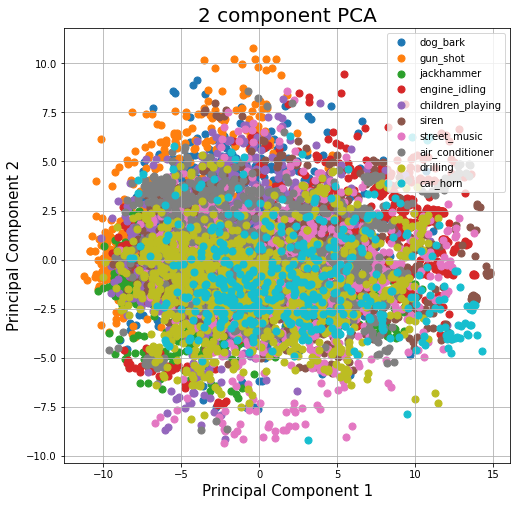

In [69]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1, 1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets =['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for target, color in zip(targets,colors):
    indicesToKeep = main_df['labels']== target
    #print(indicesToKeep[:10])
    ax.scatter(list(main_df.loc[indicesToKeep, 'pca_1'])
               ,list(main_df.loc[indicesToKeep, 'pca_2'])
               , c = color
               , s = 50)
ax.legend(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'])
ax.grid()

In [70]:
pcas=pca.explained_variance_ratio_
print("Total information ", sum(pcas))

Total information  0.3542124256491661


In [71]:
x_train, x_test, y_train, y_test = train_test_split(main_df.drop("labels", axis=1), main_df["labels"], test_size=0.2, random_state=42)

In [72]:
print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)

(6985, 2) (1747, 2) (6985,) (1747,)


In [73]:
svc_2=SVC()
svc_2.fit(x_train, y_train)

SVC()

In [74]:
svc_2.score(x_test, y_test)

0.2799084144247281

In [75]:
x_test.shape[1]

2

In [76]:
# Predictions using SVC on 50 features
predictions=svc_2.predict(x_test)


In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
 mat=confusion_matrix(predictions, y_test)

In [79]:
def acc_per_class(np_probs_array):    
    accs = []
    for idx in range(0, np_probs_array.shape[0]):
        correct = np_probs_array[idx][idx].astype(int)
        total = np_probs_array[idx].sum().astype(int)
        acc = (correct / total) * 100
        accs.append(acc)
    return accs

In [80]:
accuracies=acc_per_class(mat)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]

pd.DataFrame({'CLASS':labels, 'ACCURACY': accuracies}).sort_values(by='ACCURACY', ascending=False)

,CLASS,ACCURACY
5,Engine Idling,44.090909
6,Gun Shot,42.168675
0,Air Conditioner,36.666667
1,Car Horn,33.333333
8,Siren,28.125000
7,Jackhammer,26.315789
3,Dog bark,23.809524
4,Drilling,22.580645
2,Children Playing,21.938776
9,Street Music,18.320611
